データサイエンス特別PG データサイエンス特論 第7回 課題

In [ ]:
# google colab で実行する場合は下記のコメントアウトを外して実行する
# ! wget https://github.com/KHiraGit/sudspg_ds/raw/main/ds07_temp_power_exercise.xlsx

In [131]:
import statistics
import matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import sklearn
from sklearn import datasets
import pandas as pd
import seaborn as sns
import openpyxl
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

print('## ライブラリのバージョンを確認')
print('matplotlib:', matplotlib.__version__)
print('numpy:', np.__version__)
print('sklearn:', sklearn.__version__)
print('pandas:', pd.__version__)
print('seaborn:', sns.__version__)

## ライブラリのバージョンを確認
matplotlib: 3.4.3
numpy: 1.21.4
sklearn: 1.0.1
pandas: 1.3.4
seaborn: 0.11.2


In [96]:
power_df = pd.read_excel('ds07_temp_power_exercise.xlsx', 
                         sheet_name='東京電力パワーグリッド エリア需給実績データ', skiprows=[0,1],
                         names=['DATE', 'TIME', 'power', '', '', '', '', '', '', '', '', '', '', '', ''])
power_df['DATETIME'] = pd.to_datetime(power_df['DATE']+' '+power_df['TIME'], format='%Y/%m/%d %H:%M')

In [97]:
weather_df = pd.read_excel('ds07_temp_power_exercise.xlsx', 
                           sheet_name='2020熊谷市気象データ_data', skiprows=[0,1,2],
                           names=['年月日', '平均気温', '', '', '最高気温', '', '', '', '', '最低気温', '', '', '', '',  # 14
                           '降水量', '', '', '', '日照時間', '', '', '', '降雪量', '', '', '', '平均風速', '', '',  # 15
                           '平均蒸気圧', '', '', '平均湿度', '', '', '平均現地気圧', '', '', '', '', '', '天気概況', '', ''])

In [170]:
def temp_power_r(weather_df, power_df, year, month, _temp):
    print(f'## {year}年{month}月の{_temp}と電力需要の単回帰・多項式回帰分析')
    # 終端の年末になる場合の処理
    if month == 12:
        end_year = year + 1
        end_month = 1
    else:
        end_year = year
        end_month = month + 1

    # 対象期間・対象の気温の独立変数と応答変数を用意
    x = weather_df[(datetime.datetime(year,month,1) <= weather_df['年月日']) 
            & (weather_df['年月日'] < datetime.datetime(end_year,end_month,1))][[_temp]]
    y = power_df[(datetime.datetime(year,month,1) <= power_df['DATETIME'])
            & (power_df['DATETIME'] < datetime.datetime(end_year,end_month,1))
            & (power_df['TIME'] == '14:00')][['power']]
    pf = PolynomialFeatures(degree=2)
    x2 = pf.fit_transform(x)
    
    # 単回帰分析を実施して結果を出力
    model_lr = LinearRegression()
    model_lr.fit(x, y)
    print('y= %.6f + %.6fx (寄与率 R^2: %.6f)' 
        % (model_lr.intercept_, model_lr.coef_, model_lr.score(x, y)))

    # 多項式回帰分析を実施して結果を出力
    model_pr = LinearRegression()
    model_pr.fit(x2, y)
    print('y= %.6f + %.6fx + %.6fx^2 (寄与率 R^2: %.6f)' 
        % (model_pr.intercept_, model_pr.coef_[0][1], model_pr.coef_[0][2], model_pr.score(x2, y)))

    # 元データの散布図を作成
    fig = plt.figure(figsize=(8, 7))
    ax1 = fig.add_subplot(111)
    ax1.plot(x, y, 'o')

    # 求めた単回帰分析の結果(直線)を描画
    x_linspace = pd.DataFrame(np.linspace(x.min(), x.max(), 100), columns=[_temp])
    ax1.plot(x_linspace, model_lr.predict(x_linspace))

    # 多項式回帰分析の結果(曲線)を描画
    x_linspace_pf = pf.fit_transform(x_linspace)
    y_pred = model_pr.predict(x_linspace_pf)
    ax1.plot(x_linspace, y_pred)
    ax1.set_title(f'{year}年{month}月の{_temp}と電力需要')
    plt.show()

    return model_lr.score(x, y), model_pr.score(x2, y)

## 2020年8月の最高気温と電力需要の単回帰・多項式回帰分析
y= -839.573897 + 157.214277x (寄与率 R^2: 0.323354)
y= -49727.487490 + 2938.644102x + -39.422610x^2 (寄与率 R^2: 0.436017)


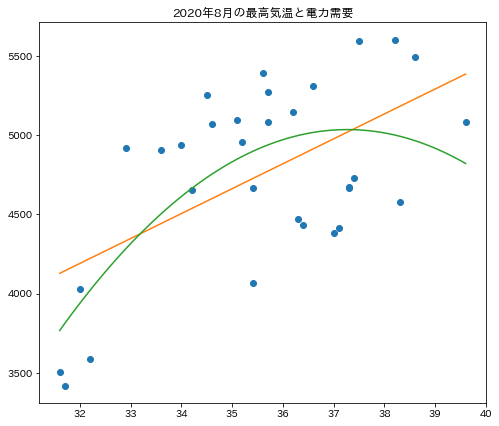

(0.3233540219227702, 0.4360172674722307)

In [178]:
temp_power_r(weather_df, power_df, 2020, 8, '最高気温')

## 2020年1月の平均気温と電力需要の単回帰・多項式回帰分析
y= 4089.801475 + -71.576571x (寄与率 R^2: 0.066047)
y= 5727.406859 + -547.252198x + 31.200305x^2 (寄与率 R^2: 0.175214)


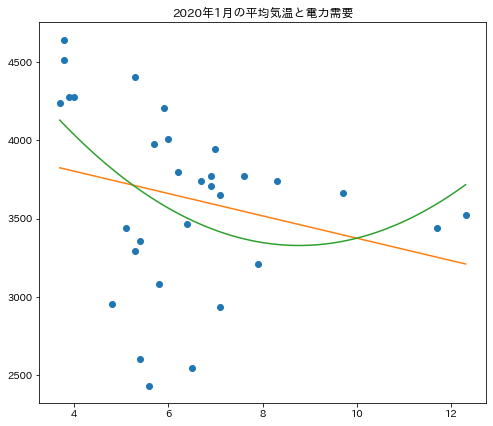

## 2020年2月の平均気温と電力需要の単回帰・多項式回帰分析
y= 3868.378208 + -53.305830x (寄与率 R^2: 0.177265)
y= 4092.685728 + -135.776385x + 6.196995x^2 (寄与率 R^2: 0.212249)


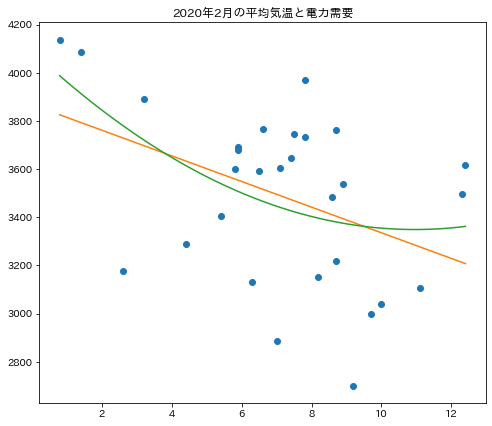

## 2020年3月の平均気温と電力需要の単回帰・多項式回帰分析
y= 4021.744397 + -67.426363x (寄与率 R^2: 0.338698)
y= 3397.593961 + 73.895492x + -7.137613x^2 (寄与率 R^2: 0.366215)


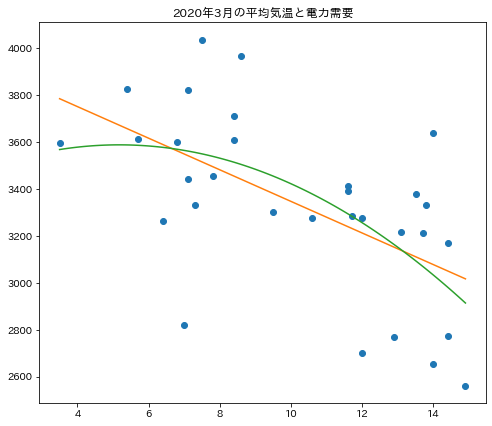

## 2020年4月の平均気温と電力需要の単回帰・多項式回帰分析
y= 4366.971129 + -106.788057x (寄与率 R^2: 0.338573)
y= 4983.385598 + -202.249605x + 3.597977x^2 (寄与率 R^2: 0.341357)


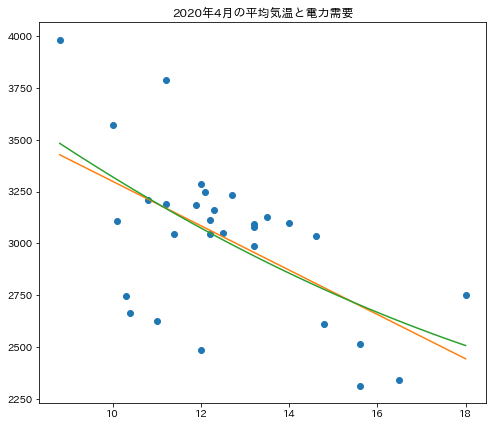

## 2020年5月の平均気温と電力需要の単回帰・多項式回帰分析
y= 2676.650379 + 8.529051x (寄与率 R^2: 0.005036)
y= 6381.125942 + -408.578826x + 11.365340x^2 (寄与率 R^2: 0.098130)


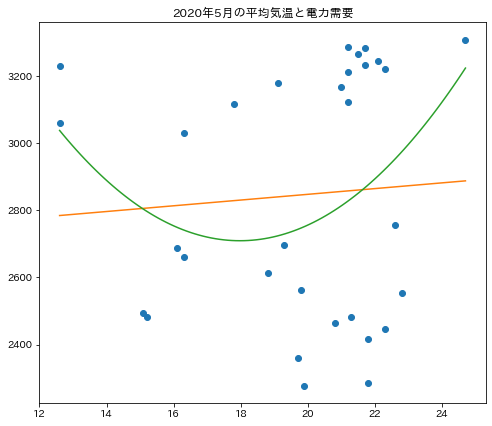

## 2020年6月の平均気温と電力需要の単回帰・多項式回帰分析
y= 237.672553 + 139.860236x (寄与率 R^2: 0.458200)
y= 8167.522636 + -541.561370x + 14.496746x^2 (寄与率 R^2: 0.491968)


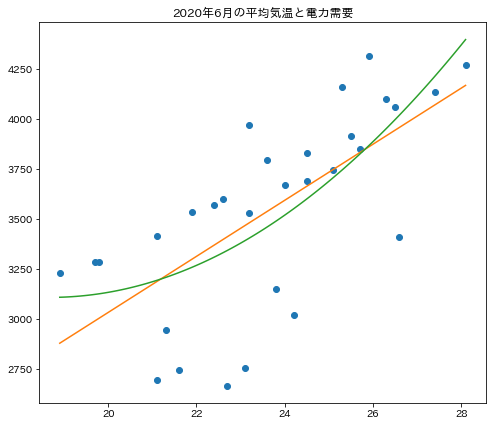

## 2020年7月の平均気温と電力需要の単回帰・多項式回帰分析
y= 755.287805 + 122.390244x (寄与率 R^2: 0.312561)
y= 14156.180407 + -1014.074130x + 23.932713x^2 (寄与率 R^2: 0.358669)


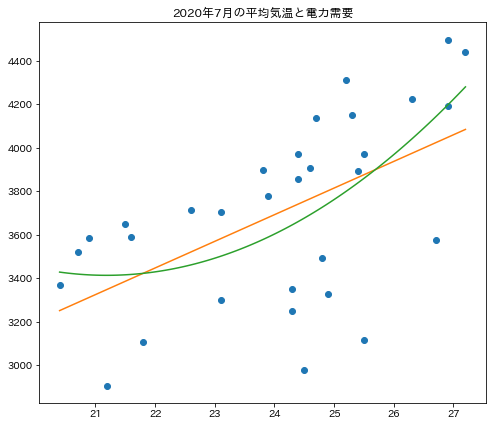

## 2020年8月の平均気温と電力需要の単回帰・多項式回帰分析
y= -907.811926 + 191.381413x (寄与率 R^2: 0.306819)
y= -61006.922474 + 4324.032153x + -70.802075x^2 (寄与率 R^2: 0.446135)


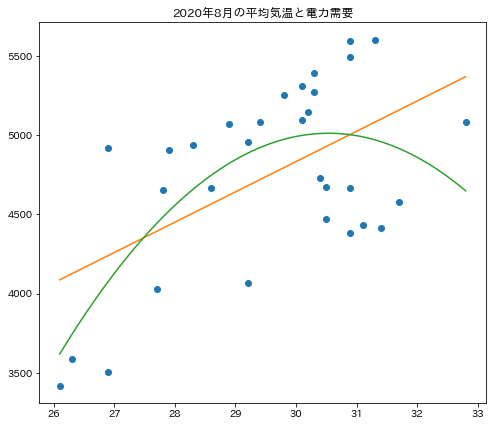

## 2020年9月の平均気温と電力需要の単回帰・多項式回帰分析
y= -1504.414978 + 225.312732x (寄与率 R^2: 0.798495)
y= 10190.465604 + -763.165858x + 20.503730x^2 (寄与率 R^2: 0.848879)


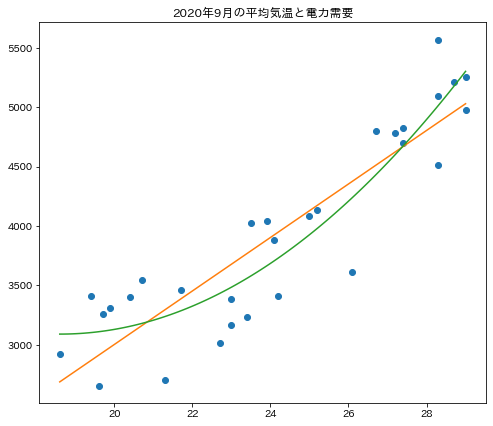

## 2020年10月の平均気温と電力需要の単回帰・多項式回帰分析
y= 2954.654086 + 13.651672x (寄与率 R^2: 0.017021)
y= 2327.692225 + 86.631026x + -2.067164x^2 (寄与率 R^2: 0.019417)


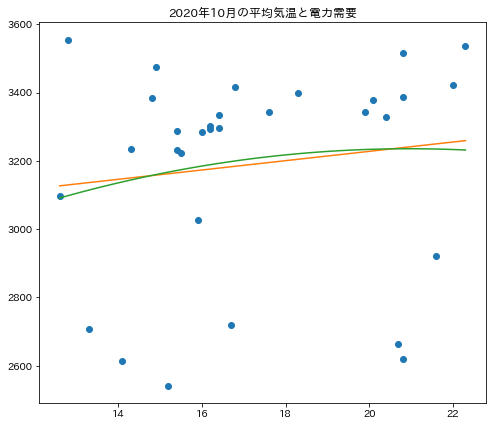

## 2020年11月の平均気温と電力需要の単回帰・多項式回帰分析
y= 3854.704920 + -51.976612x (寄与率 R^2: 0.133672)
y= 3995.373754 + -74.751702x + 0.890053x^2 (寄与率 R^2: 0.133925)


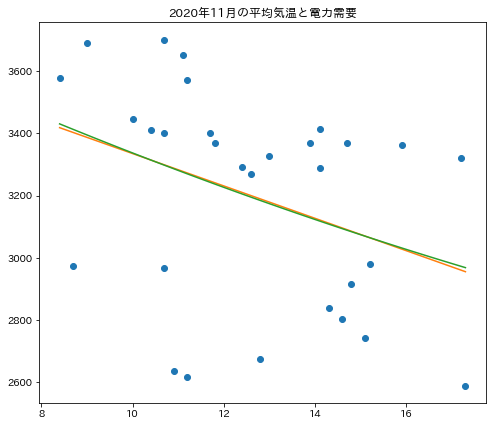

## 2020年12月の平均気温と電力需要の単回帰・多項式回帰分析
y= 3965.091909 + -38.394317x (寄与率 R^2: 0.043509)
y= 3696.860708 + 59.595740x + -7.817432x^2 (寄与率 R^2: 0.053891)


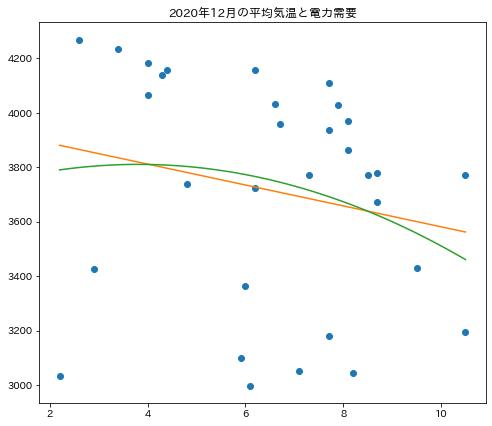

## 2020年1月の最高気温と電力需要の単回帰・多項式回帰分析
y= 4459.559336 + -72.088743x (寄与率 R^2: 0.154535)
y= 6608.704004 + -451.862961x + 15.654092x^2 (寄与率 R^2: 0.284691)


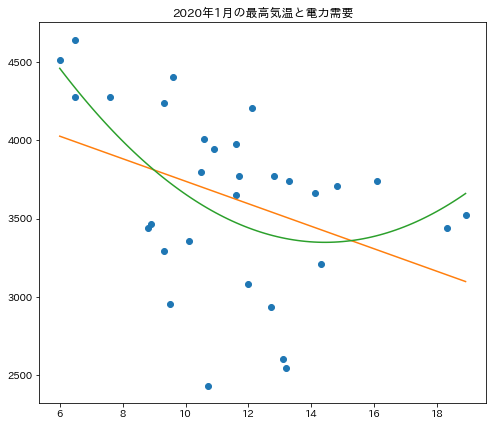

## 2020年2月の最高気温と電力需要の単回帰・多項式回帰分析
y= 4174.938067 + -53.981056x (寄与率 R^2: 0.227946)
y= 4850.815059 + -169.851043x + 4.649294x^2 (寄与率 R^2: 0.265971)


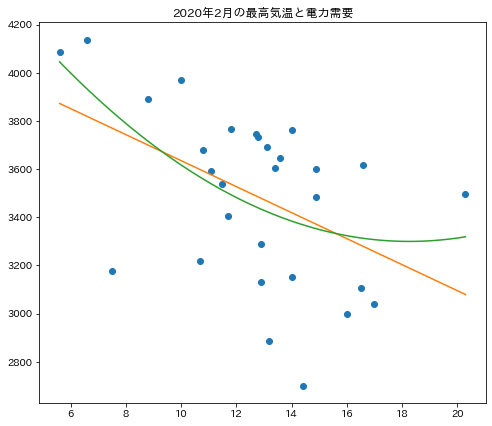

## 2020年3月の最高気温と電力需要の単回帰・多項式回帰分析
y= 4215.106775 + -55.673711x (寄与率 R^2: 0.481256)
y= 3777.489103 + 3.919071x + -1.855923x^2 (寄与率 R^2: 0.491794)


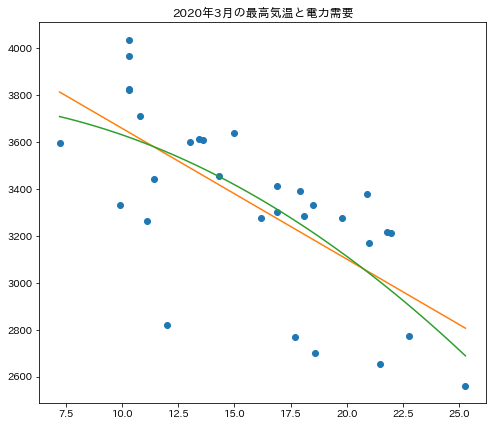

## 2020年4月の最高気温と電力需要の単回帰・多項式回帰分析
y= 4398.269617 + -74.814169x (寄与率 R^2: 0.457996)
y= 4879.689326 + -128.758451x + 1.459981x^2 (寄与率 R^2: 0.461403)


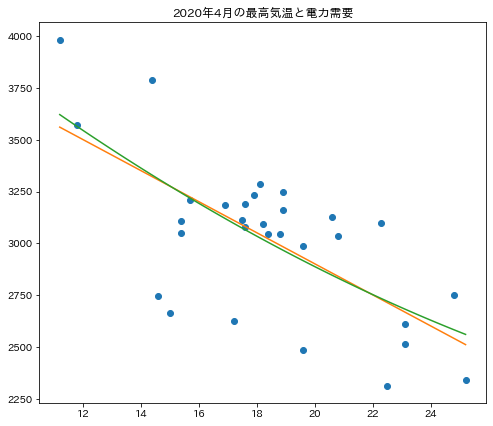

## 2020年5月の最高気温と電力需要の単回帰・多項式回帰分析
y= 2857.522166 + -0.507355x (寄与率 R^2: 0.000039)
y= 3932.157416 + -93.601600x + 1.940267x^2 (寄与率 R^2: 0.013783)


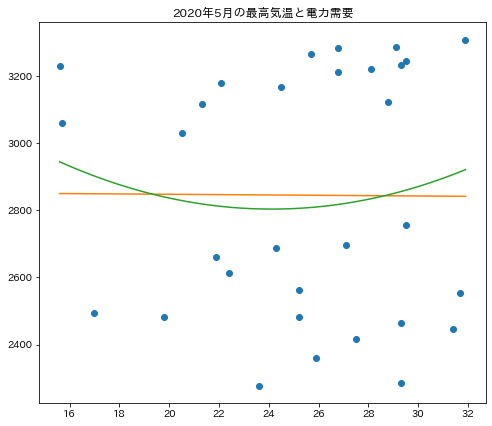

## 2020年6月の最高気温と電力需要の単回帰・多項式回帰分析
y= 1301.729211 + 78.703675x (寄与率 R^2: 0.429973)
y= 7561.654101 + -380.096740x + 8.230865x^2 (寄与率 R^2: 0.514207)


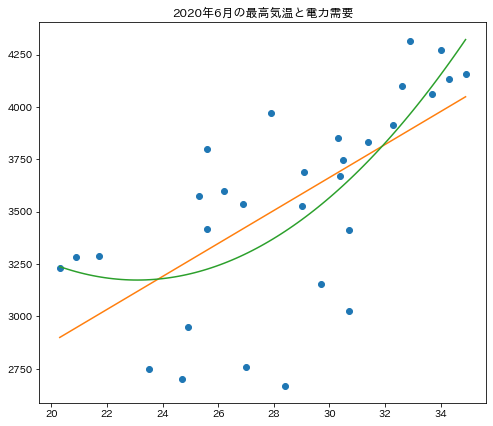

## 2020年7月の最高気温と電力需要の単回帰・多項式回帰分析
y= 1969.283424 + 62.887162x (寄与率 R^2: 0.199963)
y= -984.643995 + 274.866472x + -3.758448x^2 (寄与率 R^2: 0.209000)


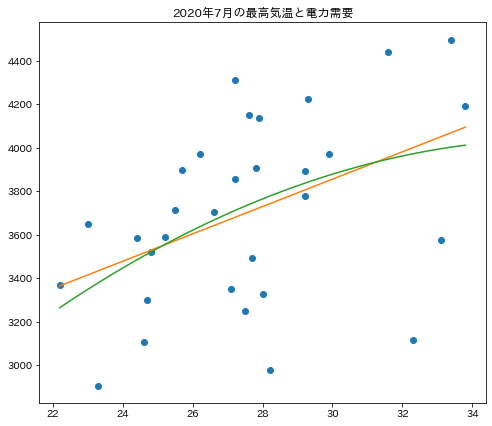

## 2020年8月の最高気温と電力需要の単回帰・多項式回帰分析
y= -839.573897 + 157.214277x (寄与率 R^2: 0.323354)
y= -49727.487490 + 2938.644102x + -39.422610x^2 (寄与率 R^2: 0.436017)


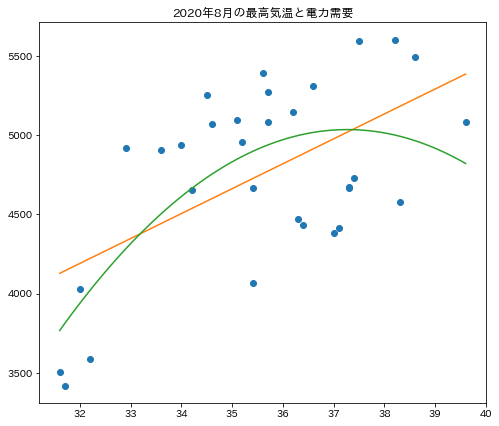

## 2020年9月の最高気温と電力需要の単回帰・多項式回帰分析
y= -843.362169 + 167.652118x (寄与率 R^2: 0.758808)
y= 5627.489817 + -295.282270x + 8.094513x^2 (寄与率 R^2: 0.793692)


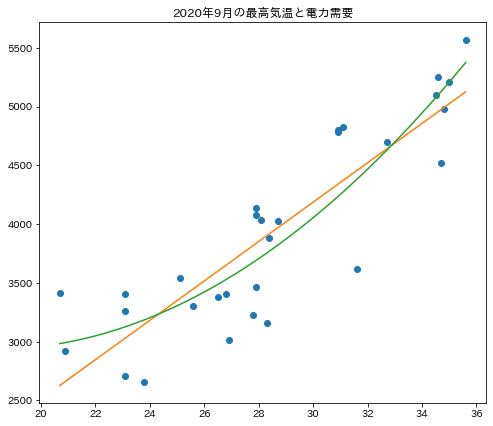

## 2020年10月の最高気温と電力需要の単回帰・多項式回帰分析
y= 3188.401772 + 0.070267x (寄与率 R^2: 0.000001)
y= 6381.989775 + -308.242496x + 7.243469x^2 (寄与率 R^2: 0.099641)


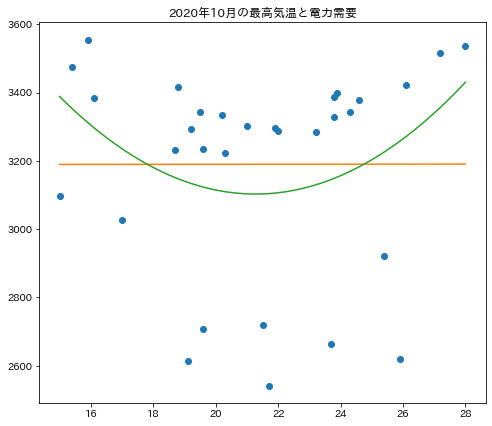

## 2020年11月の最高気温と電力需要の単回帰・多項式回帰分析
y= 4089.395546 + -49.296672x (寄与率 R^2: 0.181262)
y= 5610.571496 + -221.011551x + 4.721649x^2 (寄与率 R^2: 0.196980)


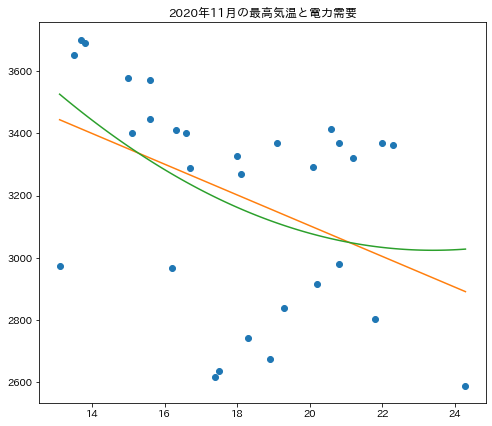

## 2020年12月の最高気温と電力需要の単回帰・多項式回帰分析
y= 4339.179835 + -49.253941x (寄与率 R^2: 0.092503)
y= 1130.350455 + 484.887250x + -21.327383x^2 (寄与率 R^2: 0.225006)


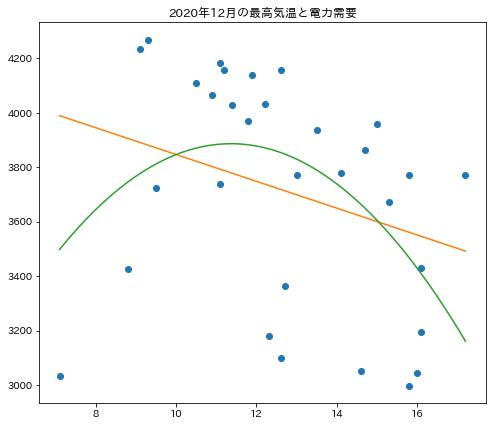

## 2020年1月の最低気温と電力需要の単回帰・多項式回帰分析
y= 3660.685382 + -14.520320x (寄与率 R^2: 0.002581)
y= 3655.134373 + 3.833784x + -3.918166x^2 (寄与率 R^2: 0.004132)


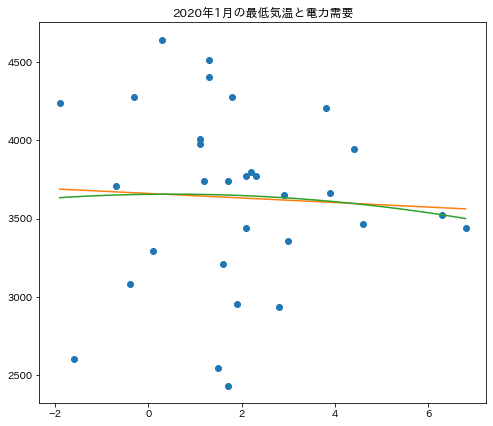

## 2020年2月の最低気温と電力需要の単回帰・多項式回帰分析
y= 3563.733388 + -38.981804x (寄与率 R^2: 0.103337)
y= 3503.324454 + -62.637793x + 8.623473x^2 (寄与率 R^2: 0.165038)


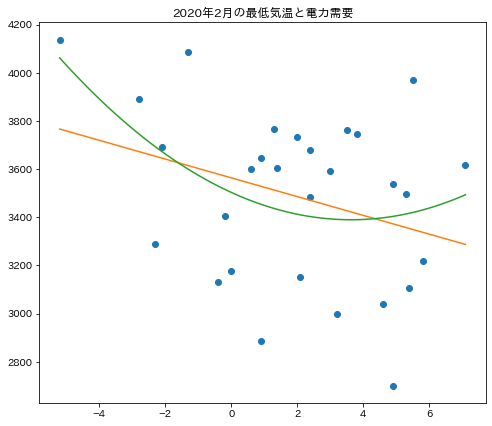

## 2020年3月の最低気温と電力需要の単回帰・多項式回帰分析
y= 3456.127829 + -23.697509x (寄与率 R^2: 0.028331)
y= 3600.269448 + -90.776053x + 5.960118x^2 (寄与率 R^2: 0.059519)


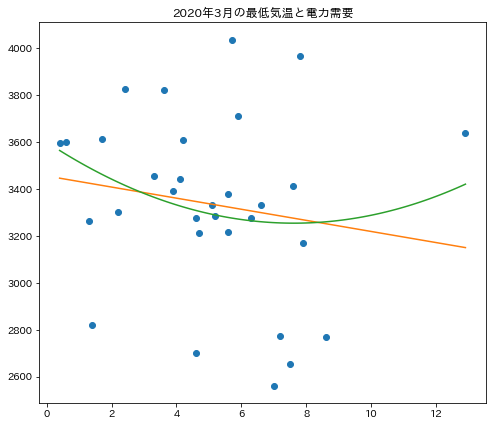

## 2020年4月の最低気温と電力需要の単回帰・多項式回帰分析
y= 2784.048819 + 32.475340x (寄与率 R^2: 0.021252)
y= 2119.969647 + 225.747393x + -13.300997x^2 (寄与率 R^2: 0.034907)


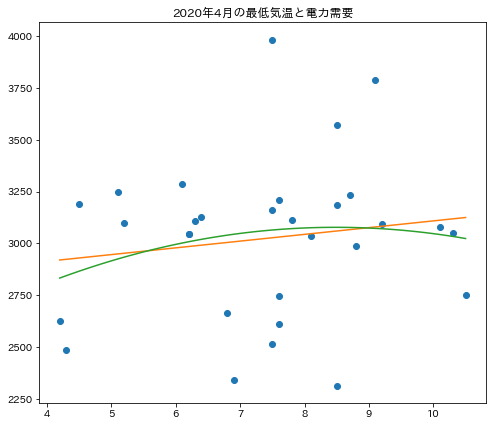

## 2020年5月の最低気温と電力需要の単回帰・多項式回帰分析
y= 2622.661679 + 15.015248x (寄与率 R^2: 0.012869)
y= 5088.995977 + -341.946357x + 12.440327x^2 (寄与率 R^2: 0.064644)


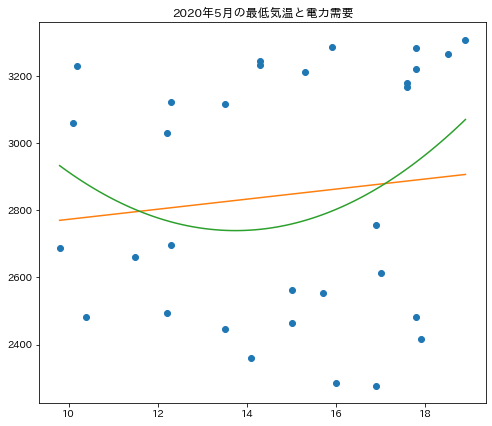

## 2020年6月の最低気温と電力需要の単回帰・多項式回帰分析
y= 508.318040 + 154.345289x (寄与率 R^2: 0.226896)
y= -14792.459093 + 1691.291065x + -38.375710x^2 (寄与率 R^2: 0.273688)


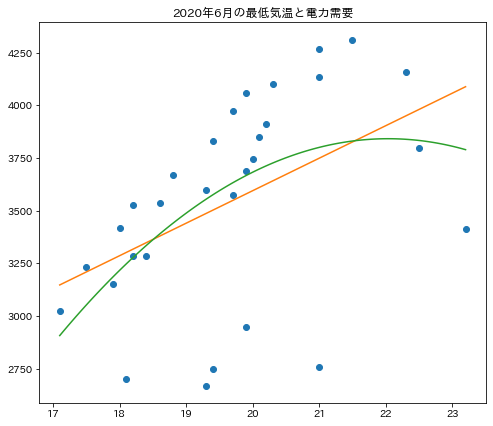

## 2020年7月の最低気温と電力需要の単回帰・多項式回帰分析
y= 1026.579758 + 125.669739x (寄与率 R^2: 0.282808)
y= 11481.043303 + -882.701757x + 24.130936x^2 (寄与率 R^2: 0.326636)


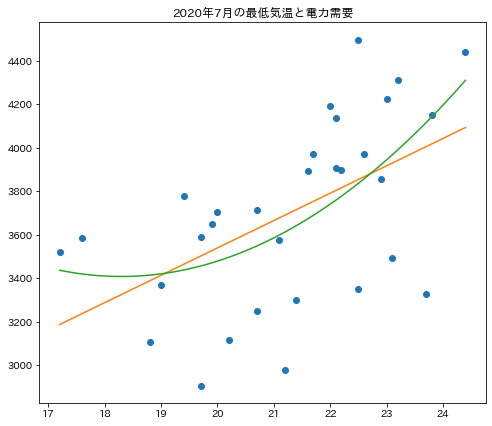

## 2020年8月の最低気温と電力需要の単回帰・多項式回帰分析
y= 910.491255 + 152.744805x (寄与率 R^2: 0.198471)
y= -35834.353984 + 3125.938291x + -59.861291x^2 (寄与率 R^2: 0.291250)


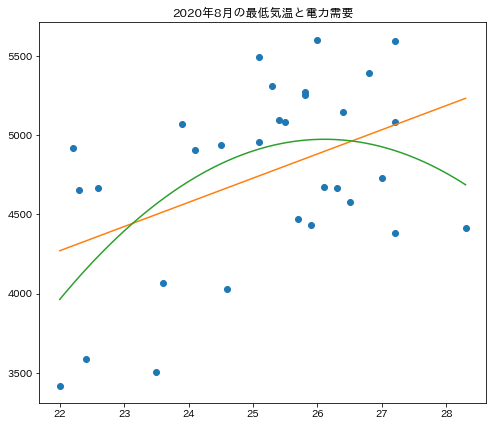

## 2020年9月の最低気温と電力需要の単回帰・多項式回帰分析
y= -622.843936 + 216.630817x (寄与率 R^2: 0.638370)
y= 10573.156362 + -900.771083x + 27.246369x^2 (寄与率 R^2: 0.736194)


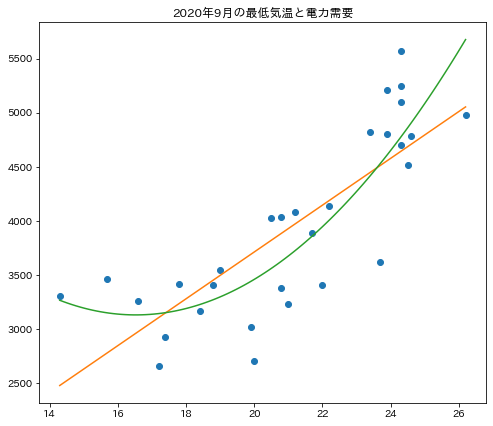

## 2020年10月の最低気温と電力需要の単回帰・多項式回帰分析
y= 2944.676257 + 17.736902x (寄与率 R^2: 0.031109)
y= 869.273625 + 328.066501x + -11.078666x^2 (寄与率 R^2: 0.110874)


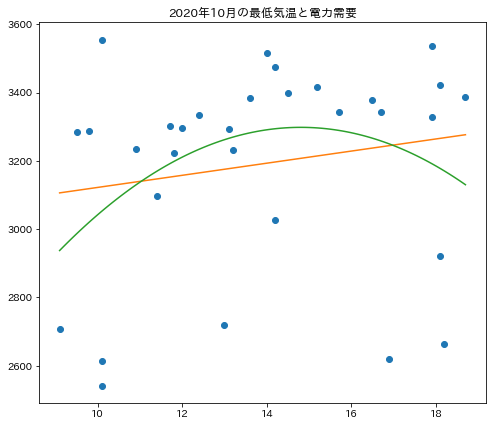

## 2020年11月の最低気温と電力需要の単回帰・多項式回帰分析
y= 3398.044973 + -25.836285x (寄与率 R^2: 0.044571)
y= 3616.692219 + -85.882071x + 3.644963x^2 (寄与率 R^2: 0.054619)


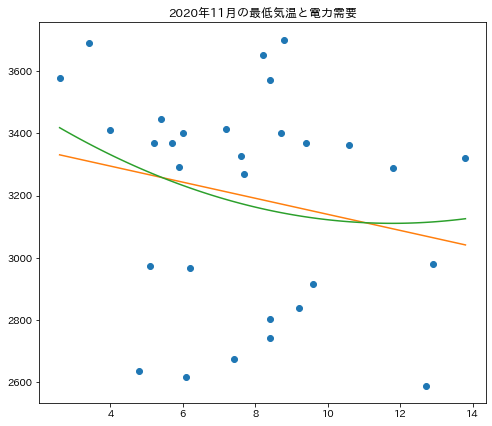

## 2020年12月の最低気温と電力需要の単回帰・多項式回帰分析
y= 3747.893492 + -27.341161x (寄与率 R^2: 0.029863)
y= 3680.604305 + -65.957532x + 14.096487x^2 (寄与率 R^2: 0.079834)


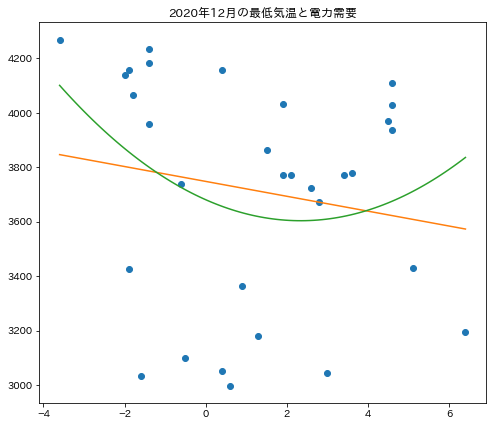

r1_min 2020/1 0.0025811994555382523
r1_max 2020/9 0.6383696658507173
r2_min 2020/1 0.004131864092257187
r2_max 2020/9 0.7361936305248551


In [177]:
for _temp in ['平均気温', '最高気温', '最低気温']:
    # 決定係数の最大・最小を調査
    r1_min = 1
    r1_min_yearmonth = 0
    r1_max = 0
    r1_max_yearmonth = 0
    r2_min = 1
    r2_min_yearmonth = ''
    r2_max = 0
    r2_max_yearmonth = ''

    for _month in range(1,13,1):
        r1, r2 = temp_power_r(weather_df, power_df, 2020, _month, _temp)
        
        if r1 < r1_min:
            r1_min = r1
            r1_min_yearmonth = f'2020/{_month}'
        if r2 < r2_min:
            r2_min = r2
            r2_min_yearmonth = f'2020/{_month}'
        if r1 > r1_max:
            r1_max = r1
            r1_max_yearmonth = f'2020/{_month}'
        if r2 > r2_max:
            r2_max = r2
            r2_max_yearmonth = f'2020/{_month}'

    print('r1_min', r1_min_yearmonth, r1_min)
    print('r1_max', r1_max_yearmonth, r1_max)
    print('r2_min', r2_min_yearmonth, r2_min)
    print('r2_max', r2_max_yearmonth, r2_max)

In [172]:
def temp_power_r_year(weather_df, power_df, year, _temp):
    print(f'## {year}年の{_temp}と電力需要の単回帰・多項式回帰分析')

    x = weather_df[(datetime.datetime(year,1,1) <= weather_df['年月日']) 
            & (weather_df['年月日'] < datetime.datetime(year+1,1,1))][[_temp]]
    y = power_df[(datetime.datetime(year,1,1) <= power_df['DATETIME'])
            & (power_df['DATETIME'] < datetime.datetime(year+1,1,1))
            & (power_df['TIME'] == '14:00')][['power']]
    pf = PolynomialFeatures(degree=2)
    x2 = pf.fit_transform(x)
    
    # 単回帰分析を実施して結果を出力
    model_lr = LinearRegression()
    model_lr.fit(x, y)
    print('y= %.6f + %.6fx (寄与率 R^2: %.6f)' 
        % (model_lr.intercept_, model_lr.coef_, model_lr.score(x, y)))

    # 多項式回帰分析を実施して結果を出力
    model_pr = LinearRegression()
    model_pr.fit(x2, y)
    print('y= %.6f + %.6fx + %.6fx^2 (寄与率 R^2: %.6f)' 
        % (model_pr.intercept_, model_pr.coef_[0][1], model_pr.coef_[0][2], model_pr.score(x2, y)))

    # 元データの散布図を作成
    fig = plt.figure(figsize=(8, 7))
    ax1 = fig.add_subplot(111)
    ax1.plot(x, y, 'o')

    # 求めた単回帰分析の結果(直線)を描画
    x_linspace = pd.DataFrame(np.linspace(x.min(), x.max(), 100), columns=[_temp])
    ax1.plot(x_linspace, model_lr.predict(x_linspace))

    # 多項式回帰分析の結果(曲線)を描画
    x_linspace_pf = pf.fit_transform(x_linspace)
    y_pred = model_pr.predict(x_linspace_pf)
    ax1.plot(x_linspace, y_pred)
    ax1.set_title(f'{year}年の{_temp}と電力需要')
    plt.show()

    return model_lr.score(x, y), model_pr.score(x2, y)

## 2020年の平均気温と電力需要の単回帰・多項式回帰分析
y= 3074.707505 + 28.320114x (寄与率 R^2: 0.116956)
y= 4798.650339 + -240.082546x + 8.000520x^2 (寄与率 R^2: 0.604744)


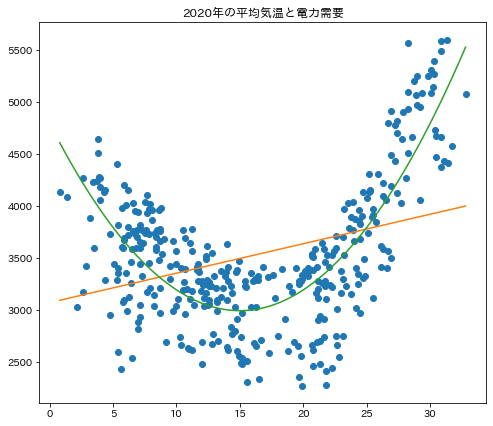

## 2020年の最高気温と電力需要の単回帰・多項式回帰分析
y= 2953.829190 + 27.107423x (寄与率 R^2: 0.109962)
y= 5812.728129 + -270.314009x + 6.674358x^2 (寄与率 R^2: 0.558706)


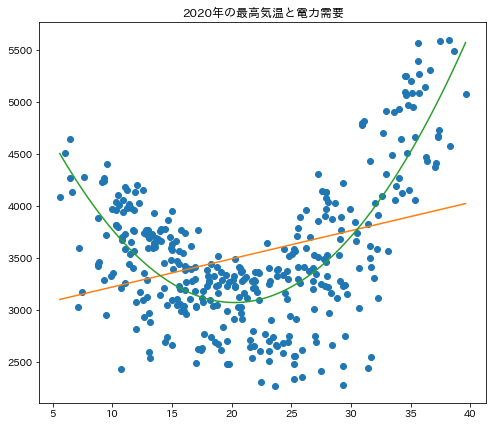

## 2020年の最低気温と電力需要の単回帰・多項式回帰分析
y= 3211.765219 + 27.257596x (寄与率 R^2: 0.122633)
y= 3747.714602 + -145.542713x + 7.042327x^2 (寄与率 R^2: 0.538163)


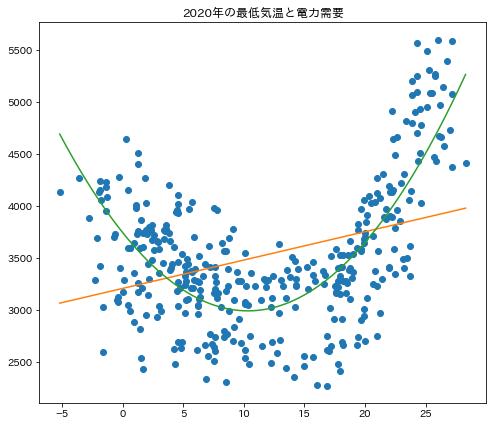

In [173]:
for _temp in ['平均気温', '最高気温', '最低気温']:
    temp_power_r_year(weather_df, power_df, 2020, _temp)